In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [105]:
train=pd.read_csv(r'C:\Users\naren\Desktop\FlipRobo - Internship\Malignant Comments Classifier Project\train.csv')
test=pd.read_csv(r'C:\Users\naren\Desktop\FlipRobo - Internship\Malignant Comments Classifier Project\test.csv')

In [106]:
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [107]:
train.drop(['id'],axis=1,inplace=True)

In [108]:
train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [109]:
train.isnull().sum()

comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [110]:
test.drop(['id'],axis=1,inplace=True)

In [111]:
ctype=['malignant','highly_malignant','rude','threat','abuse','loathe']

In [112]:
for i in ctype:
    print(train[i].value_counts())

0    144277
1     15294
Name: malignant, dtype: int64
0    157976
1      1595
Name: highly_malignant, dtype: int64
0    151122
1      8449
Name: rude, dtype: int64
0    159093
1       478
Name: threat, dtype: int64
0    151694
1      7877
Name: abuse, dtype: int64
0    158166
1      1405
Name: loathe, dtype: int64


In [113]:
#Remove Punctuations
train['comment_text']=train['comment_text'].str.replace(r'[^\w\d\s]',' ')
test['comment_text']=test['comment_text'].str.replace(r'[^\w\d\s]',' ')

#Replacing additional spaces between words with a single space
train['comment_text']=train['comment_text'].str.replace(r'\s+',' ')
test['comment_text']=test['comment_text'].str.replace(r'\s+',' ')
#Repalacing leading and trailing spaces
train['comment_text']=train['comment_text'].str.replace(r'^\s+|\s+?$','')
test['comment_text']=test['comment_text'].str.replace(r'^\s+|\s+?$','')


In [114]:
#Remove stopwords
import string
import nltk
from nltk.corpus import stopwords

stop_words=set(stopwords.words('english') + ['u'])
train['comment_text']=train['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))
test['comment_text']=test['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))


In [115]:
train.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,Explanation Why edits made username Hardcore M...,0,0,0,0,0,0
1,D aww He matches background colour I seemingly...,0,0,0,0,0,0
2,Hey man I really trying edit war It guy consta...,0,0,0,0,0,0
3,More I make real suggestions improvement I won...,0,0,0,0,0,0
4,You sir hero Any chance remember page,0,0,0,0,0,0


malignant


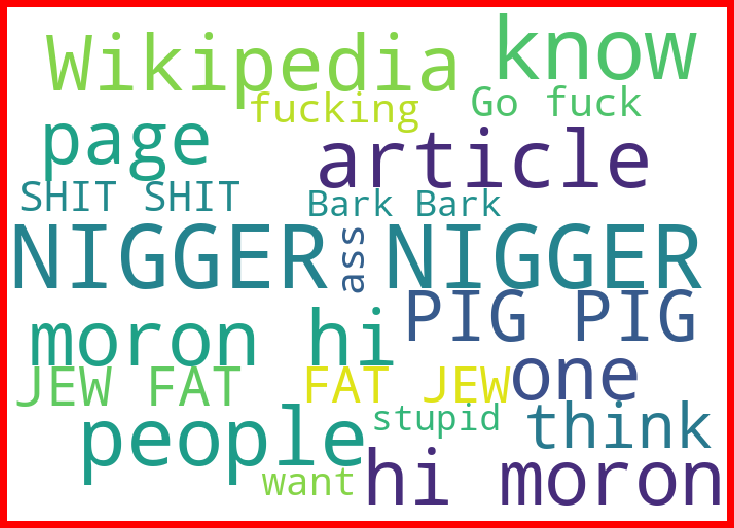

highly_malignant


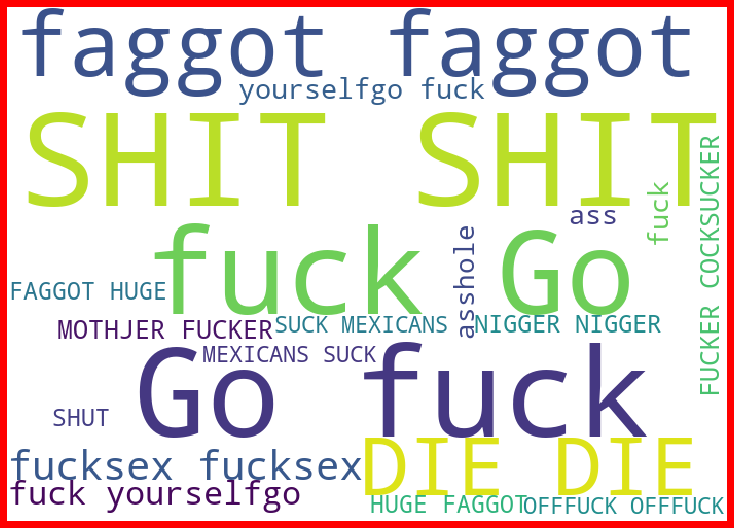

rude


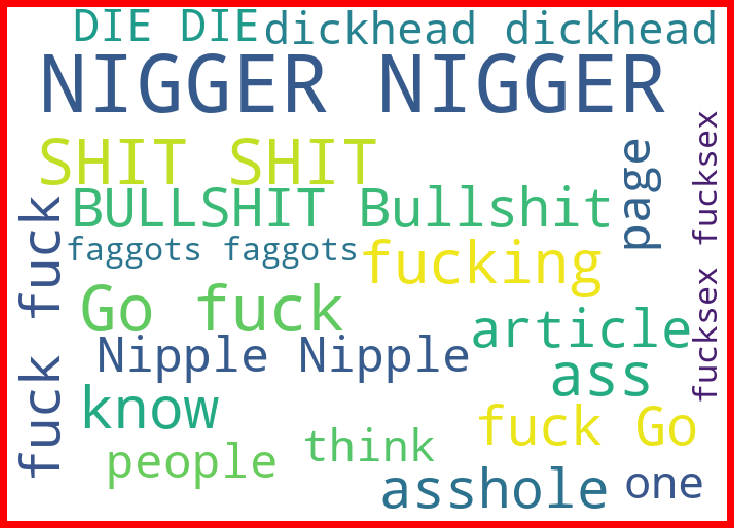

threat


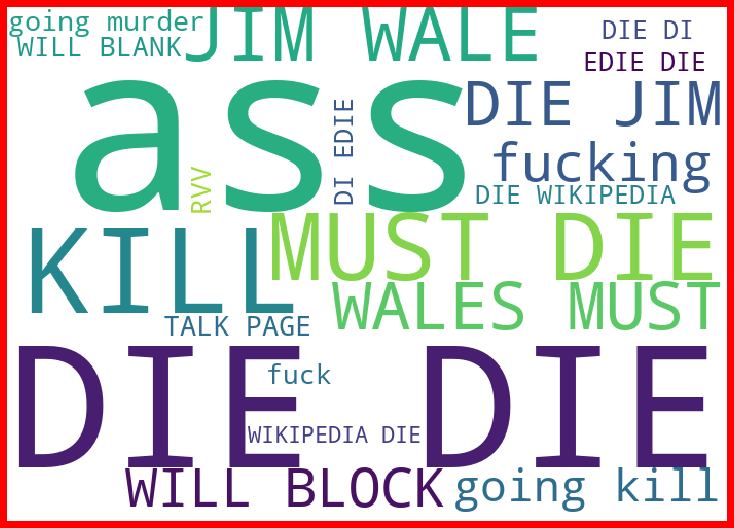

abuse


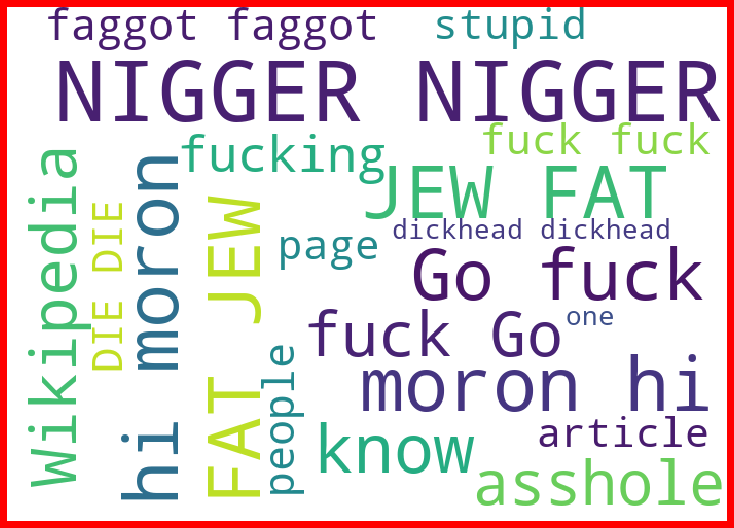

loathe


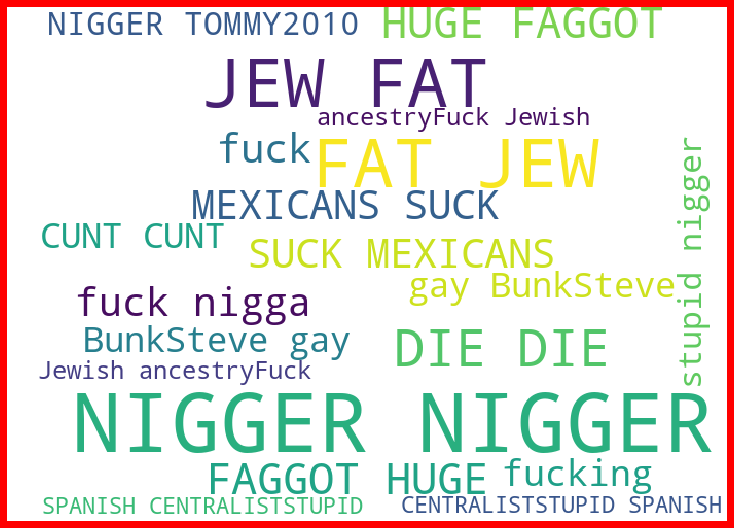

In [116]:
from wordcloud import WordCloud
for i in ctype:
    typer=train['comment_text'][train[i]==1]
    typer_cloud=WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(typer))
    print(i)
    plt.figure(figsize=(10,8),facecolor='r')
    plt.imshow(typer_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

In [117]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics                                                 
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix,classification_report,auc,roc_curve
from sklearn.svm import LinearSVC
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import cross_val_score

malignant
accuracy:   91.941
roc-auc score = 0.5859937005246633


Classification Report
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     28812
           1       0.99      0.17      0.29      3103

    accuracy                           0.92     31915
   macro avg       0.96      0.59      0.63     31915
weighted avg       0.93      0.92      0.89     31915



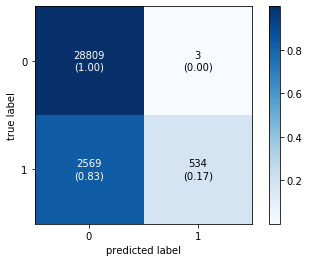

highly_malignant
accuracy:   99.047
roc-auc score = 0.4999841832215614


Classification Report
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     31612
           1       0.00      0.00      0.00       303

    accuracy                           0.99     31915
   macro avg       0.50      0.50      0.50     31915
weighted avg       0.98      0.99      0.99     31915



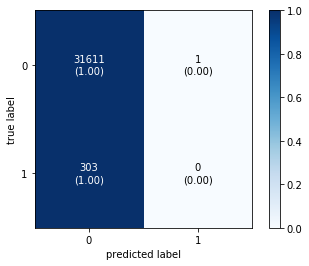

rude
accuracy:   95.303
roc-auc score = 0.555720213396562


Classification Report
               precision    recall  f1-score   support

           0       0.95      1.00      0.98     30228
           1       1.00      0.11      0.20      1687

    accuracy                           0.95     31915
   macro avg       0.98      0.56      0.59     31915
weighted avg       0.96      0.95      0.93     31915



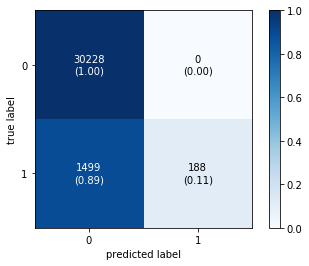

threat
accuracy:   99.687
roc-auc score = 0.504950495049505


Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     31814
           1       1.00      0.01      0.02       101

    accuracy                           1.00     31915
   macro avg       1.00      0.50      0.51     31915
weighted avg       1.00      1.00      1.00     31915



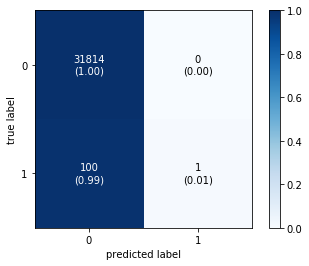

abuse
accuracy:   95.269
roc-auc score = 0.522438647081687


Classification Report
               precision    recall  f1-score   support

           0       0.95      1.00      0.98     30341
           1       0.91      0.05      0.09      1574

    accuracy                           0.95     31915
   macro avg       0.93      0.52      0.53     31915
weighted avg       0.95      0.95      0.93     31915



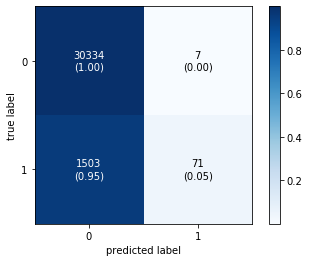

loathe
accuracy:   99.101
roc-auc score = 0.4999841917227861


Classification Report
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     31629
           1       0.00      0.00      0.00       286

    accuracy                           0.99     31915
   macro avg       0.50      0.50      0.50     31915
weighted avg       0.98      0.99      0.99     31915



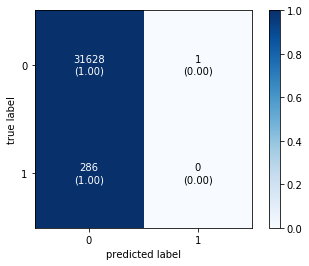

In [118]:
for i in ctype:
    x_train,x_test,y_train,y_test = train_test_split(train['comment_text'],train[i],test_size=0.2, random_state = 1)
    print('\033[1m' + i)
    pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
    ])

    model = pipe.fit(x_train, y_train)
    prediction = model.predict(x_test)

    score = metrics.accuracy_score(y_test, prediction)
    print("accuracy:   %0.3f" % (score*100))
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,prediction)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc-auc score =',roc_auc)

    print('\n')
    print('Classification Report\n',classification_report(y_test,prediction))

    cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])




    fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                    show_absolute=True,
                                    show_normed=True,
                                    colorbar=True)
    plt.show()
    
    m1=[]
    m1.append(['Multionomial',i,roc_auc,cm])
    

malignant
accuracy:   96.077
roc-auc score = 0.8444132909762193


Classification Report
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     28812
           1       0.87      0.70      0.78      3103

    accuracy                           0.96     31915
   macro avg       0.92      0.84      0.88     31915
weighted avg       0.96      0.96      0.96     31915



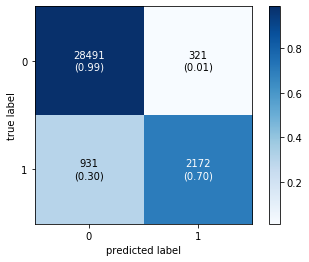

highly_malignant
accuracy:   99.079
roc-auc score = 0.6701145677645076


Classification Report
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     31612
           1       0.52      0.34      0.41       303

    accuracy                           0.99     31915
   macro avg       0.76      0.67      0.70     31915
weighted avg       0.99      0.99      0.99     31915



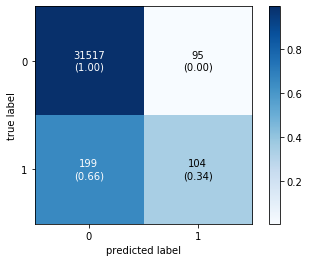

rude
accuracy:   97.898
roc-auc score = 0.8542964597296078


Classification Report
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     30228
           1       0.86      0.71      0.78      1687

    accuracy                           0.98     31915
   macro avg       0.92      0.85      0.89     31915
weighted avg       0.98      0.98      0.98     31915



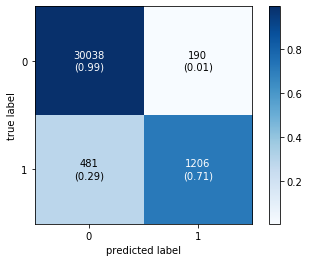

threat
accuracy:   99.718
roc-auc score = 0.6136727899231113


Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     31814
           1       0.66      0.23      0.34       101

    accuracy                           1.00     31915
   macro avg       0.83      0.61      0.67     31915
weighted avg       1.00      1.00      1.00     31915



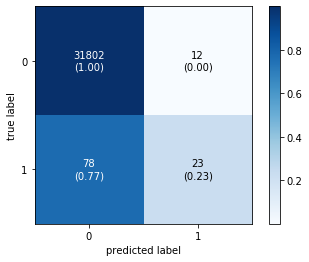

abuse
accuracy:   97.158
roc-auc score = 0.7931998762729461


Classification Report
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     30341
           1       0.78      0.60      0.67      1574

    accuracy                           0.97     31915
   macro avg       0.88      0.79      0.83     31915
weighted avg       0.97      0.97      0.97     31915



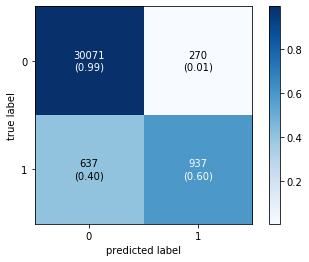

loathe
accuracy:   99.245
roc-auc score = 0.6375744066866139


Classification Report
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     31629
           1       0.70      0.28      0.40       286

    accuracy                           0.99     31915
   macro avg       0.85      0.64      0.70     31915
weighted avg       0.99      0.99      0.99     31915



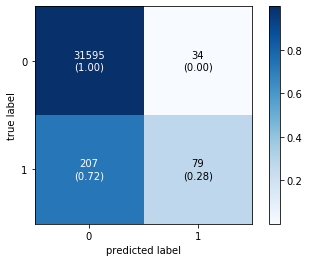

In [119]:
for i in ctype:
    x_train,x_test,y_train,y_test = train_test_split(train['comment_text'],train[i],test_size=0.2, random_state = 1)
    print('\033[1m' + i)
    pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC())
    ])

    model = pipe.fit(x_train, y_train)
    prediction = model.predict(x_test)

    score = metrics.accuracy_score(y_test, prediction)
    print("accuracy:   %0.3f" % (score*100))
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,prediction)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc-auc score =',roc_auc)

    print('\n')
    print('Classification Report\n',classification_report(y_test,prediction))

    cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])




    fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                    show_absolute=True,
                                    show_normed=True,
                                    colorbar=True)
    plt.show()

malignant
accuracy:   95.231
roc-auc score = 0.8395839627820059


Classification Report
               precision    recall  f1-score   support

           0       0.97      0.98      0.97     28812
           1       0.79      0.70      0.74      3103

    accuracy                           0.95     31915
   macro avg       0.88      0.84      0.86     31915
weighted avg       0.95      0.95      0.95     31915



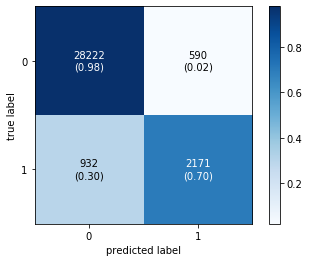

highly_malignant
accuracy:   98.850
roc-auc score = 0.7049156041758801


Classification Report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     31612
           1       0.40      0.42      0.41       303

    accuracy                           0.99     31915
   macro avg       0.70      0.70      0.70     31915
weighted avg       0.99      0.99      0.99     31915



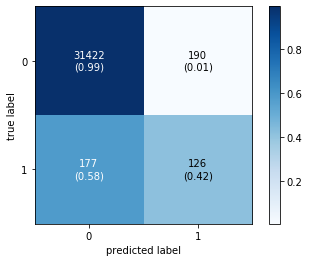

rude
accuracy:   97.672
roc-auc score = 0.8609411193757712


Classification Report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     30228
           1       0.81      0.73      0.77      1687

    accuracy                           0.98     31915
   macro avg       0.90      0.86      0.88     31915
weighted avg       0.98      0.98      0.98     31915



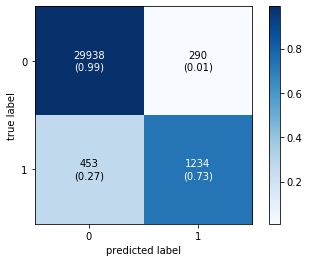

threat
accuracy:   99.715
roc-auc score = 0.658070081855737


Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     31814
           1       0.59      0.32      0.41       101

    accuracy                           1.00     31915
   macro avg       0.80      0.66      0.71     31915
weighted avg       1.00      1.00      1.00     31915



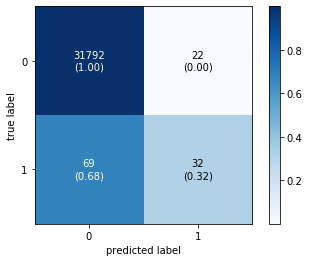

abuse
accuracy:   96.676
roc-auc score = 0.804516458349099


Classification Report
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     30341
           1       0.68      0.62      0.65      1574

    accuracy                           0.97     31915
   macro avg       0.83      0.80      0.82     31915
weighted avg       0.97      0.97      0.97     31915



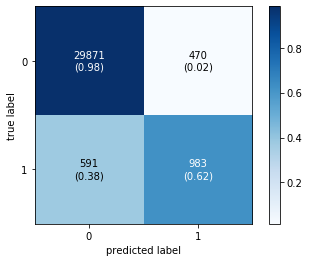

loathe
accuracy:   99.101
roc-auc score = 0.6628338780003392


Classification Report
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     31629
           1       0.50      0.33      0.40       286

    accuracy                           0.99     31915
   macro avg       0.75      0.66      0.70     31915
weighted avg       0.99      0.99      0.99     31915



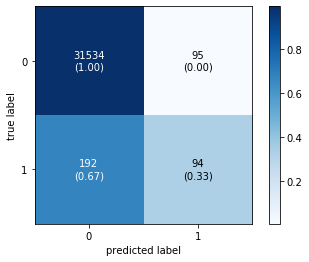

In [120]:
for i in ctype:
    x_train,x_test,y_train,y_test = train_test_split(train['comment_text'],train[i],test_size=0.2, random_state = 1)
    print('\033[1m' + i)
    pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', PassiveAggressiveClassifier())
    ])

    model = pipe.fit(x_train, y_train)
    prediction = model.predict(x_test)

    score = metrics.accuracy_score(y_test, prediction)
    print("accuracy:   %0.3f" % (score*100))
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,prediction)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc-auc score =',roc_auc)

    print('\n')
    print('Classification Report\n',classification_report(y_test,prediction))

    cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])




    fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                    show_absolute=True,
                                    show_normed=True,
                                    colorbar=True)
    plt.show()

malignant
accuracy:   95.548
roc-auc score = 0.7957582843722374


Classification Report
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     28812
           1       0.92      0.60      0.72      3103

    accuracy                           0.96     31915
   macro avg       0.94      0.80      0.85     31915
weighted avg       0.95      0.96      0.95     31915



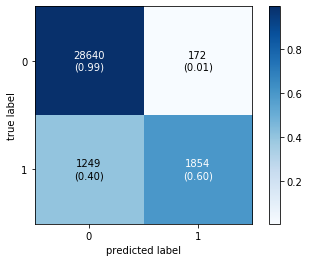

highly_malignant
accuracy:   99.047
roc-auc score = 0.6307320422666081


Classification Report
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     31612
           1       0.50      0.26      0.34       303

    accuracy                           0.99     31915
   macro avg       0.74      0.63      0.67     31915
weighted avg       0.99      0.99      0.99     31915



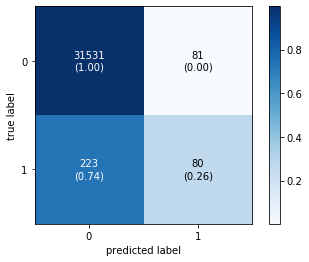

rude
accuracy:   97.647
roc-auc score = 0.8084781211106203


Classification Report
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     30228
           1       0.90      0.62      0.74      1687

    accuracy                           0.98     31915
   macro avg       0.94      0.81      0.86     31915
weighted avg       0.98      0.98      0.97     31915



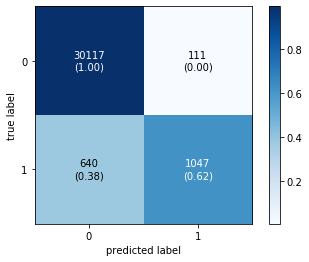

threat
accuracy:   99.690
roc-auc score = 0.5395096622882883


Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     31814
           1       0.57      0.08      0.14       101

    accuracy                           1.00     31915
   macro avg       0.78      0.54      0.57     31915
weighted avg       1.00      1.00      1.00     31915



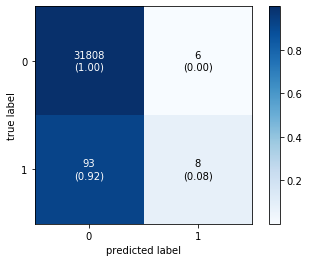

abuse
accuracy:   97.055
roc-auc score = 0.756212956271256


Classification Report
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     30341
           1       0.82      0.52      0.63      1574

    accuracy                           0.97     31915
   macro avg       0.90      0.76      0.81     31915
weighted avg       0.97      0.97      0.97     31915



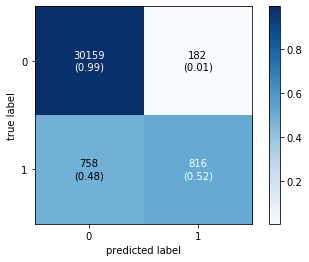

loathe
accuracy:   99.179
roc-auc score = 0.5800717983208735


Classification Report
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     31629
           1       0.68      0.16      0.26       286

    accuracy                           0.99     31915
   macro avg       0.83      0.58      0.63     31915
weighted avg       0.99      0.99      0.99     31915



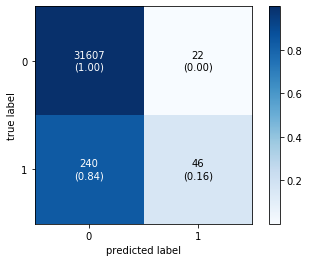

In [121]:
for i in ctype:
    x_train,x_test,y_train,y_test = train_test_split(train['comment_text'],train[i],test_size=0.2, random_state = 1)
    print('\033[1m' + i)
    pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression())
    ])

    model = pipe.fit(x_train, y_train)
    prediction = model.predict(x_test)

    score = metrics.accuracy_score(y_test, prediction)
    print("accuracy:   %0.3f" % (score*100))
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,prediction)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc-auc score =',roc_auc)

    print('\n')
    print('Classification Report\n',classification_report(y_test,prediction))

    cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])




    fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                    show_absolute=True,
                                    show_normed=True,
                                    colorbar=True)
    plt.show()

accuracy:   95.548
roc-auc score = 0.7957582843722374


Classification Report
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     28812
           1       0.92      0.60      0.72      3103

    accuracy                           0.96     31915
   macro avg       0.94      0.80      0.85     31915
weighted avg       0.95      0.96      0.95     31915



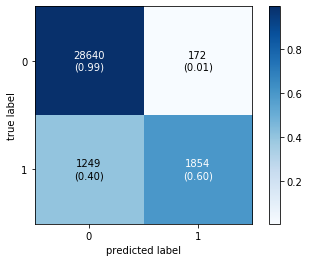

In [122]:
x_train,x_test,y_train,y_test = train_test_split(train['comment_text'],train['malignant'],test_size=0.2, random_state = 1)

pipe = Pipeline([
('vect', CountVectorizer()),
('tfidf', TfidfTransformer()),
('clf', LogisticRegression())
])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

score = metrics.accuracy_score(y_test, prediction)
print("accuracy:   %0.3f" % (score*100))
false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,prediction)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('roc-auc score =',roc_auc)

print('\n')
print('Classification Report\n',classification_report(y_test,prediction))

cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])




fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                    show_absolute=True,
                                    show_normed=True,
                                    colorbar=True)
plt.show()